In [2]:
import io 
import numpy as np
import sigpy as sp
import scipy.io as sciio
import torch

In [48]:
data = torch.tensor(np.load("../data/augmented_data/T1w/T1_norm_volunteer10_1.npy")[None,:,:,:])

In [19]:
data.shape

torch.Size([1, 320, 320])

In [23]:
hist1= torch.histc(data,bins=50)

In [24]:
hist.shape

(50,)

In [26]:
hist1

tensor([5.5117e+04, 2.5720e+03, 1.4220e+03, 1.0520e+03, 1.0990e+03, 1.2650e+03,
        1.4220e+03, 1.5890e+03, 2.1940e+03, 2.8310e+03, 3.8980e+03, 6.4070e+03,
        7.4050e+03, 5.6220e+03, 4.0740e+03, 1.8020e+03, 4.3200e+02, 2.6400e+02,
        2.0500e+02, 1.7400e+02, 1.4600e+02, 1.5000e+02, 1.3000e+02, 1.1300e+02,
        9.2000e+01, 1.1200e+02, 1.0600e+02, 1.1200e+02, 7.3000e+01, 7.6000e+01,
        7.8000e+01, 9.5000e+01, 6.5000e+01, 4.7000e+01, 4.4000e+01, 3.5000e+01,
        2.1000e+01, 1.2000e+01, 1.2000e+01, 1.0000e+01, 9.0000e+00, 7.0000e+00,
        2.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00])

In [ ]:
b = np.array([1])

In [31]:
bin_edge

array([-0.01499778,  0.06151087,  0.13801953,  0.21452818,  0.29103683,
        0.36754548,  0.44405413,  0.52056279,  0.59707144,  0.67358009,
        0.75008874,  0.82659739,  0.90310604,  0.9796147 ,  1.05612335,
        1.132632  ,  1.20914065,  1.2856493 ,  1.36215796,  1.43866661,
        1.51517526,  1.59168391,  1.66819256,  1.74470122,  1.82120987,
        1.89771852,  1.97422717,  2.05073582,  2.12724448,  2.20375313,
        2.28026178,  2.35677043,  2.43327908,  2.50978774,  2.58629639,
        2.66280504,  2.73931369,  2.81582234,  2.892331  ,  2.96883965,
        3.0453483 ,  3.12185695,  3.1983656 ,  3.27487425,  3.35138291,
        3.42789156,  3.50440021,  3.58090886,  3.65741751,  3.73392617,
        3.81043482])

In [36]:
edge = torch.linspace(data.min(),data.max(),50)

In [49]:
dd = torch.cat((data,data,data,data))

In [66]:
dd.unsqueeze(1).shape

torch.Size([4, 1, 1, 320, 320])

In [50]:
dd.shape

torch.Size([4, 1, 320, 320])

In [58]:
def normal_h(dd):
    n = dd.shape[0]
    p = torch.zeros(dd.shape)
    for i in range(n):
        hist = torch.histc(dd[i,:,:,:], bins=50)
        edge = torch.linspace(data.min(),data.max(),50)
        # ignore the bin representing the background and get the bin boundary for white matter
        hist[0] = 0
        wm_bin_lower = bin_edge[hist.argmax()]
        wm_bin_upper = bin_edge[hist.argmax() + 1]

        # get the median in the white matter bin
        data_temp = data[(data > wm_bin_lower)]
        wm = data_temp[data_temp < wm_bin_upper]
        wm_median = torch.median(wm)
        p[i,:,:,:] = dd[i,:,:,:]/wm_median
    return p

In [59]:
p = normal_h(dd)

In [64]:
import sigpy.plot as pl
%matplotlib notebook

<IPython.core.display.Javascript object>


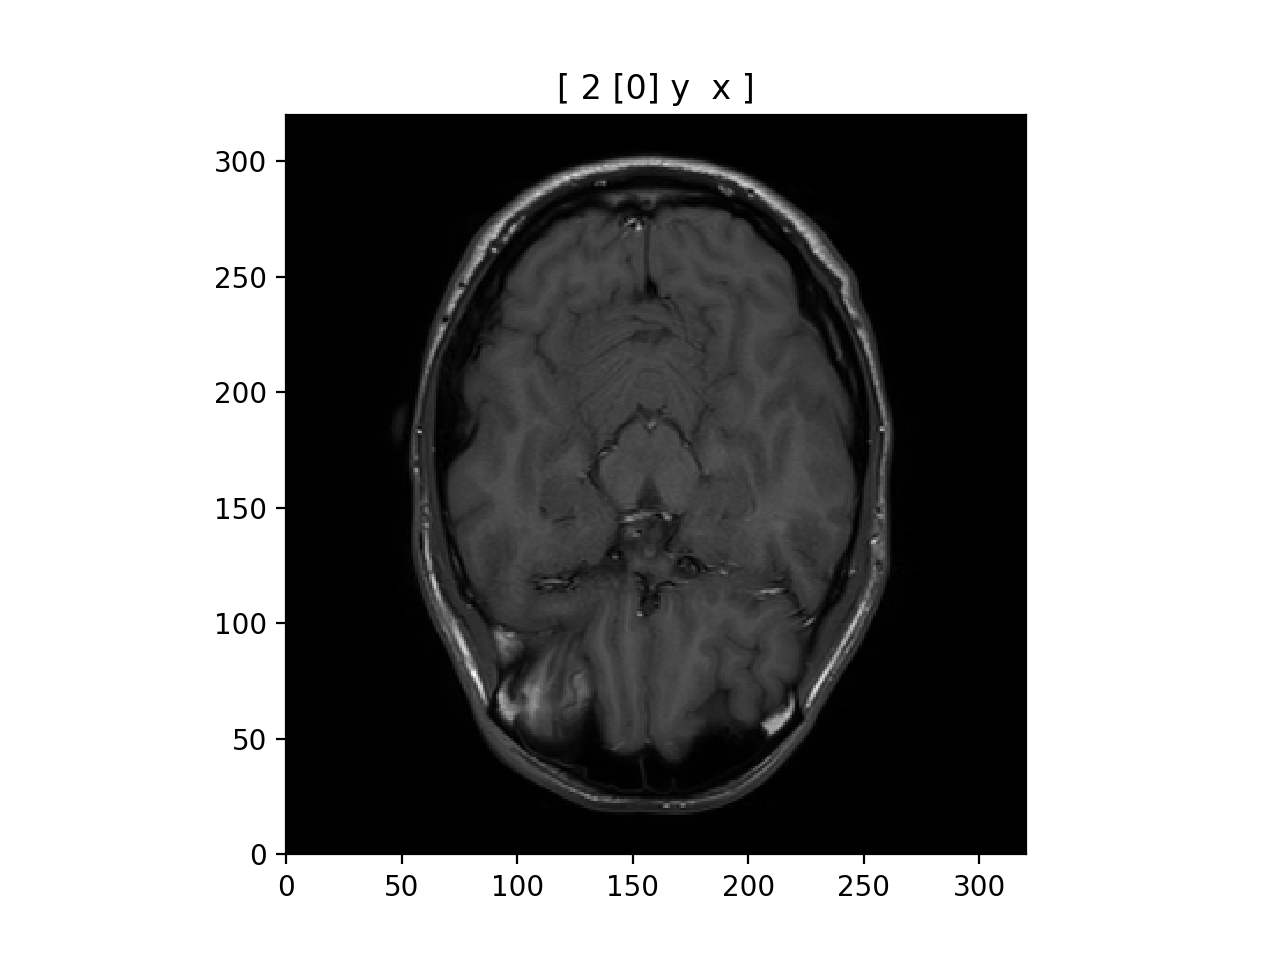

In [65]:
pl.Image(p.cpu().numpy())

In [52]:
wm_median

tensor(0.9402)

In [44]:
hist, bin_edge = np.histogram(data, bins=50)

# ignore the bin representing the background and get the bin boundary for white matter
hist[0] = 0
wm_bin_lower = bin_edge[hist.argmax()]
wm_bin_upper = bin_edge[hist.argmax() + 1]

# get the median in the white matter bin
data_temp = data[(data > wm_bin_lower)]
wm = data_temp[data_temp < wm_bin_upper]
wm_median = np.median(wm)

In [29]:
bin_edge.shape

(51,)

In [5]:
dictionary = sciio.loadmat("/mikRAID/giant/virtue/images/MRF/direct_contrast_synthesis/DictionaryAndSequenceInfo/fp_dictionary.mat")

In [6]:
dictionary

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 06 13:36:28 2017',
 '__version__': '1.0',
 '__globals__': [],
 'fp_dict': array([[(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [7.9874012e-44, 8.1275311e-44, 5.0912396e-40, ..., 1.2390497e-35,
         1.2356142e-35, 1.2323069e-35],
        [1.4012985e-45, 7.0064923e-45, 4.0172424e-41, ..., 2.7220836e-35,
         2.7145362e-35, 2.7072705e-35],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3151184e-36,
         1.4079306e-36, 1.5041318e-36],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3825122e-36,
         1.4782498e-36, 1.5773319e-36],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4287632e-36,
         1.5266514e-36, 1.6279704e-36]], dtype=float32), array([[-0.00812182, -0.00719178, -0.00719182, ...,  0.03346432,
          0.03335859,  0.03325693],
        [-0.00944535, -0.0